In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
Exchange_Rate = pd.read_excel("../00_Data/Original_data/Exchange_Rate.xlsx")
Exchange_Rate.head()

,Date,Exchange Rate
0,201101월,"1,121.5"
1,201102월,"1,128.7"
2,201103월,"1,096.7"
3,201104월,"1,071.5"
4,201105월,"1,079.2"


In [17]:
Exchange_Rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           160 non-null    object
 1   Exchange Rate  160 non-null    object
dtypes: object(2)
memory usage: 2.6+ KB


In [18]:
Exchange_Rate_drop = Exchange_Rate.dropna()
Exchange_Rate_drop

,Date,Exchange Rate
0,201101월,"1,121.5"
1,201102월,"1,128.7"
2,201103월,"1,096.7"
3,201104월,"1,071.5"
4,201105월,"1,079.2"
...,...,...
155,202312월,"1,288.0"
156,202401월,"1,334.6"
157,202402월,"1,331.5"
158,202403월,"1,347.2"


In [19]:
Exchange_Rate_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           160 non-null    object
 1   Exchange Rate  160 non-null    object
dtypes: object(2)
memory usage: 2.6+ KB


In [20]:
Exchange_Rate_drop.describe()

,Date,Exchange Rate
count,160,160
unique,160,156
top,201101월,"1,135.1"
freq,1,2


In [21]:
Exchange_Rate_drop.dtypes

Date             object
Exchange Rate    object
dtype: object

In [25]:
from datetime import datetime, timedelta
from scipy.interpolate import interp1d
import pandas as pd

# Given monthly data
Exchange_Rate_drop['Date'] = Exchange_Rate_drop['Date'].astype(str)

monthly_data = Exchange_Rate_drop.values

# Convert year-month formatted strings to date objects
dates = [datetime.strptime(str(year_month), '%Y%m월') for year_month, _ in monthly_data]

# Values of monthly data
values = [float(value.replace(',', '')) for _, value in monthly_data]  # Remove ',' and convert to float

# Sort date and value data by date
sorted_indices = np.argsort(dates)
sorted_dates = [dates[i] for i in sorted_indices]
sorted_values = [values[i] for i in sorted_indices]

# Create an interpolation function
f = interp1d([date.timestamp() for date in sorted_dates], sorted_values, kind='linear')

# Generate interpolated daily data
start_date = sorted_dates[0]
end_date = sorted_dates[-1]

daily_dates = []
current_date = start_date
while current_date <= end_date:
    daily_dates.append(current_date)
    current_date += timedelta(days=1)

daily_values = [f(date.timestamp()) for date in daily_dates]

# Print the result
daily_data = list(zip(daily_dates, daily_values))

# Convert to DataFrame and rename columns
interpolation_function_Exchange_Rate_drop = pd.DataFrame(daily_data, columns=['Date', 'Exchange Rate'])
int


,Date,Exchange Rate
0,2011-01-01,1121.5
1,2011-01-02,1121.7322580645161
2,2011-01-03,1121.9645161290323
3,2011-01-04,1122.1967741935484
4,2011-01-05,1122.4290322580646


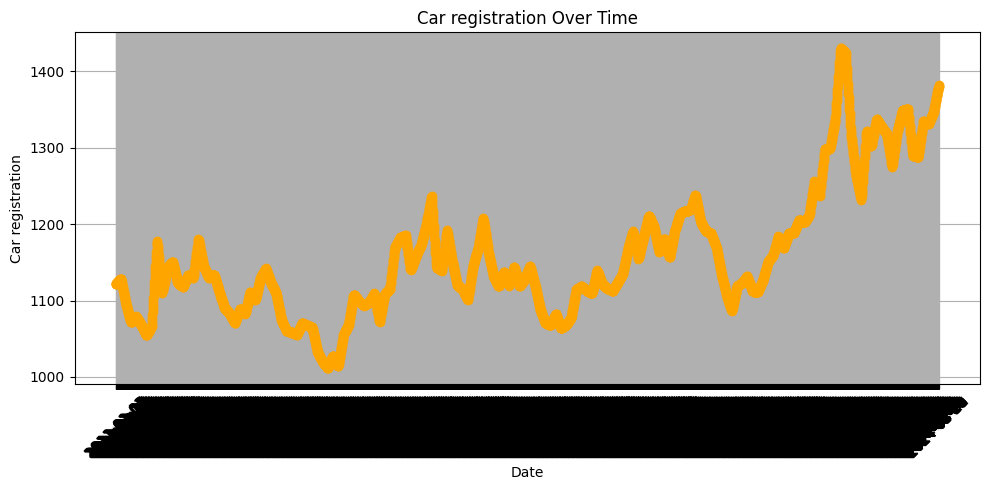

In [27]:
# Visualization
plt.figure(figsize=(10, 5))
plt.plot(interpolation_function_Exchange_Rate_drop['Date'], interpolation_function_Exchange_Rate_drop['Exchange Rate'], marker='o', color='orange')
plt.title('Car registration Over Time')
plt.xlabel('Date')
plt.ylabel('Car registration')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [24]:
interpolation_function_Exchange_Rate_drop.to_excel("../00_Data/Transformed_data/interpolation_function_Exchange_Rate_drop.xlsx")